# Support Vector Machines
Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms. In this exercise, we will develop the intuition behind support vector machines and their use in classification problems.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

To begin with, let us generate the data for a linear classification problem. In order to do so use the `make_blobs` function from `sklearn`. We want to generate 50 samples, set the `random_state=0` and `cluster_std=0.6`. Finally plot the points with `plt.scatter`

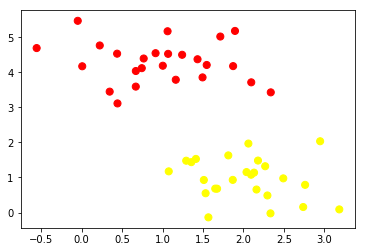

In [2]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.show()

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. Think about a line that separates the two classes, how many are there? Which do you think would be the more appropiate given the data points? Draw some lines over this plot with slopes [1, 0.5, -0.2] and biases [0.65, 1.6, 2.9]. Use the `np.linespace` function to generate the x and the line equation 

$$y = mx + b$$

for the y. Finally plot a "new point" in the coordinates (0.6, 2.1) with a red X.

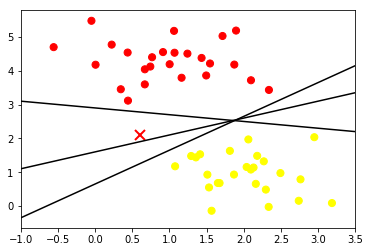

In [3]:
xfit = np.linspace(-1, 3.5)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)
plt.show()

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label!.

Support vector machines offer one way to improve on this. The intuition is this: rather than simply drawing a line between the classes, we can draw around each line a margin of some width, up to the nearest point (no matter the class). To visualize this, let us repeat the same plot but adding some code to fill the margins. Use the method `plt.fill_between` with `color='#AAAAAA'`. The margins for each of the lines above are [0.33, 0.55, 0.2].

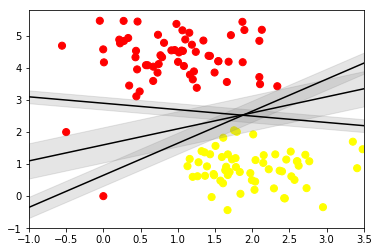

In [18]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='gray', alpha=0.2)

plt.xlim(-1, 3.5)
plt.show()

Now fit an SVM to this data. Use Scikit-Learn's support vector classifier to train an SVM model. For the time being, we will use a linear kernel and set the C parameter to a very large number like 1E10. 



In [5]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Now retrieve the support vectors from the learned model. Would you be able to identify them on the plot? Why are these the support vectors? Why are they important?

In [6]:
model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

This function will plot the decision boundaries of a model and the support vectors. 

In [7]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none',
                   edgecolors='blue')
        
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

Generate a scatter plot of the data set and use the previous function to draw the support vectors and the decision boundaries 

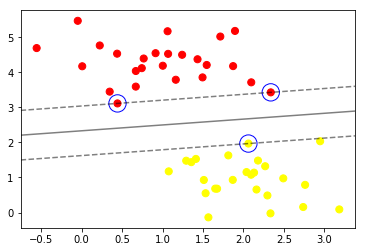

In [8]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

In order to see an example of this, simulate the points with the same random seed, but now simulate 120. Then train again the SVM and plot the decision boundaries. Which are the support vectors this time? Is this an expected result? Why?

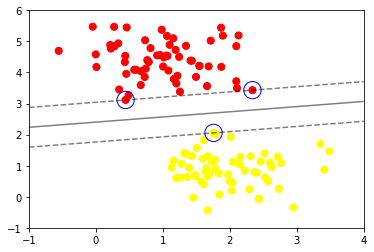

In [9]:
X, y = make_blobs(n_samples=120, centers=2,
                  random_state=0, cluster_std=0.60)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plot_svc_decision_function(model)

Now add a new point which is inside the decision boundary, say (-0.5, 2) to class 0, what do you expect will happen?

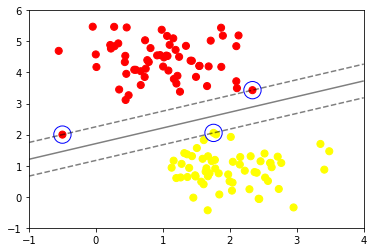

In [10]:
X = np.vstack((X, np.array([-0.5, 2])))
y = np.append(y, 0)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plot_svc_decision_function(model)

How about adding an even more outlier, like (0, 0) to class 0.

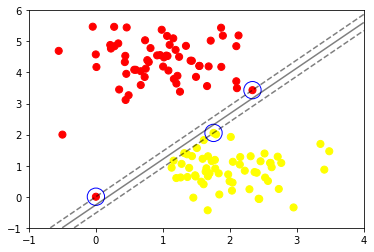

In [11]:
X = np.vstack((X, np.array([0, 0])))
y = np.append(y, 0)

model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plot_svc_decision_function(model)

What happened to the margin? Could we use this model if we had a red point further right? Why?

Now, is there a way that we could try to make the SVM more robust to these possible outliers? Which one? Try to implement an SVM model with the same data modifying the C parameter. What do you observe?

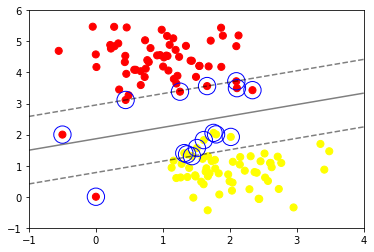

In [12]:
model = SVC(kernel='linear', C=0.1)
model.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plot_svc_decision_function(model)